This notebook fetches the FluSight data from the CDC and saves it in a .csv file. The main purpose is as a workaround to concatenate the output of two ADRIOS, `InfluenzaStateHospitalization` and `CurrentStateHospitalization`.

In [1]:
import numpy as np
import pandas as pd
from epymorph.geography.us_census import StateScope
from epymorph.simulation import Context
from epymorph.time import TimeFrame
from epymorph.adrio.cdc import (
    CurrentStateHospitalization,
    InfluenzaStateHospitalization,
)

old_adrio = InfluenzaStateHospitalization()
new_adrio = CurrentStateHospitalization(disease="Influenza")

my_scope = StateScope.all(year=2015)
my_rng = np.random.default_rng(seed=0)

old_time_frame = TimeFrame.range(
    old_adrio._TIME_RANGE.start_date, old_adrio._TIME_RANGE.end_date
)

new_time_frame = TimeFrame.range(
    new_adrio._TIME_RANGE.start_date, new_adrio._TIME_RANGE.end_date
)

old_result = old_adrio.with_context_internal(
    Context.of(scope=my_scope, time_frame=old_time_frame, rng=my_rng)
).inspect()

new_result = new_adrio.with_context_internal(
    Context.of(scope=my_scope, time_frame=new_time_frame, rng=my_rng)
).inspect()

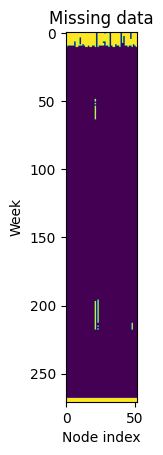

In [2]:
from matplotlib import pyplot as plt

plt.imshow(
    np.concatenate([old_result.issues["missing"], new_result.issues["missing"]], axis=0)
)
plt.title("Missing data")
plt.ylabel("Week")
plt.xlabel("Node index")
plt.show()

In [ ]:
A = pd.concat([old_result.source, new_result.source]).pivot_table(
    index=["date", "geoid"],
    values="value",
)

A.reindex(pd.MultiIndex.from_product(A.index.levels)).fillna(0).astype(int).to_csv(
    "./cases.csv"
)